In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.81
def tof_range(v, theta):
    time = 2*v*(np.sin(theta) - np.cos(theta))/9.81
    r = v**2*np.sin(2*theta)/9.81
    return time, r

Above cell does the following computation on a list of angles:
$$ t = \dfrac{2v(\sin(\theta) - \cos(\theta))}{g} \\ r = \dfrac{v^2*\sin(2\theta)}{g} $$

In [3]:
theta = np.linspace(np.pi*.25, np.pi*.5, num = 100)
charge_velocity = [910,820,750,700,625,550,485]
data = [tof_range(v, theta) for v in charge_velocity]

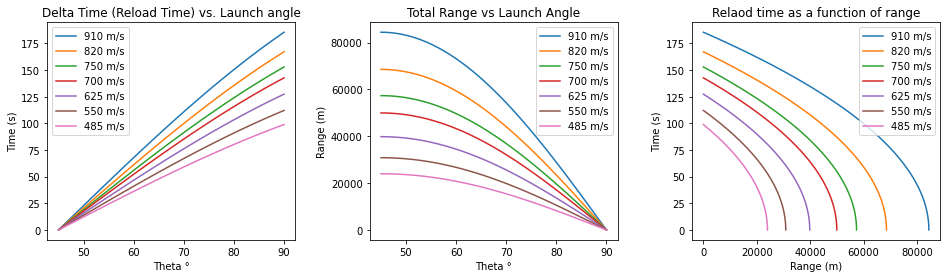

In [4]:
fig = plt.figure(figsize = (16, 4))
fig.subplots_adjust(wspace = .3)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
theta_deg = np.degrees(theta)

ax1.set_title("Delta Time (Reload Time) vs. Launch angle")
ax1.set_xlabel("Theta °")
ax1.set_ylabel("Time (s)")

ax2.set_title("Total Range vs Launch Angle")
ax2.set_xlabel("Theta °")
ax2.set_ylabel("Range (m)")

ax3.set_title("Relaod time as a function of range")
ax3.set_xlabel("Range (m)")
ax3.set_ylabel("Time (s)")

for times, ranges in data:
    ax1.plot(theta_deg, times)
    ax2.plot(theta_deg, ranges)
    ax3.plot(ranges, times)

labels = [str(v)+' m/s' for v in charge_velocity]
ax1.legend(labels)
ax2.legend(labels)
ax3.legend(labels)

In [5]:
def find_solutions(r, min_t):
    return {v: (np.degrees(d), 90 - np.degrees(d))
            for v in charge_velocity if (d := np.arcsin(g*r/v**2)*.5) and 2*v*(np.cos(d) - np.sin(d))/g >= min_t}

Above cell finds the list of angles and velocities which match the given range, and have a greater time difference than the given
returns velocity: (angle, 90 - angle) by calculating the angle $$\theta = \arcsin\left(\frac{g\Delta x}{v^2}\right)$$ and calculates the time as given above

In [6]:
find_solutions(20000, 41)

{910: (6.852646801526137, 83.14735319847387),
 820: (8.482593566523434, 81.51740643347657),
 750: (10.20696765614434, 79.79303234385566),
 700: (11.801848606278611, 78.19815139372139),
 625: (15.075214246927874, 74.92478575307213),
 550: (20.217878788697128, 69.78212121130287)}